# Visualizing_Daily_Log_Returns_(Stock_Return_Histogram)

In [1]:
# Install required packages 
%pip install --quiet yfinance scipy

Note: you may need to restart the kernel to use updated packages.


In [10]:
# 📊 Load stock data from your uploaded Excel file

import pandas as pd

# Replace this with your actual uploaded file path if different
file_path = "Stock_price_data.xlsx"

# Read Excel file (assuming first sheet has your stock data)
df = pd.read_excel(file_path)

# Show first few rows to confirm structure
df.head()


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [11]:
# 🧹 Clean column names
df.columns = [col.strip() for col in df.columns]

# Try to detect the adjusted close column automatically
adj_close_col = None
for col in df.columns:
    if "adj" in col.lower() and "close" in col.lower():
        adj_close_col = col
        break

if adj_close_col is None:
    raise ValueError("❌ Couldn't find an 'Adj Close' column. Please check column names in your Excel file.")

print(f"✅ Using column '{adj_close_col}' as Adjusted Close.")

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', adj_close_col])
df = df.sort_values(by='Date')

# Rename for consistency
df = df.rename(columns={adj_close_col: 'Adj Close'})

print("✅ Data cleaned successfully.")
print(f"Total rows: {len(df)}")
df.head()


✅ Using column 'Adj Close**' as Adjusted Close.
✅ Data cleaned successfully.
Total rows: 1258


,Date,Open,High,Low,Close*,Adj Close,Volume
1257,2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000


In [12]:
import numpy as np

df['Log_Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
df = df.dropna(subset=['Log_Return'])

print("✅ Log returns calculated successfully.")
df.head()


✅ Log returns calculated successfully.


,Date,Open,High,Low,Close*,Adj Close,Volume,Log_Return
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,-0.007249
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,0.000216
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,0.013793
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,0.003900
1252,2018-05-08,24341.35,24412.34,24198.34,24360.21,24360.21,344940000,0.000119


In [13]:
stats = df['Log_Return'].describe()
print("📈 Summary Statistics of Daily Log Returns:\n")
print(stats)

📈 Summary Statistics of Daily Log Returns:

count    1257.000000
mean        0.000276
std         0.013567
min        -0.138418
25%        -0.004698
50%         0.000725
75%         0.006309
max         0.107643
Name: Log_Return, dtype: float64


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


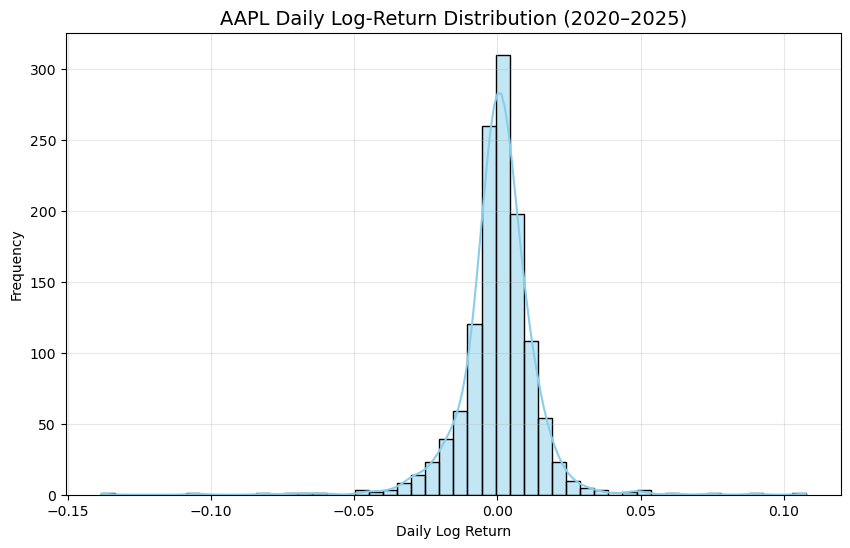

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Log_Return'], bins=50, kde=True, color='skyblue')
plt.title("AAPL Daily Log-Return Distribution (2020–2025)", fontsize=14)
plt.xlabel("Daily Log Return")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()


In [15]:
mean_return = df['Log_Return'].mean()
std_dev = df['Log_Return'].std()

print(f"📊 Average Daily Log Return: {mean_return:.6f}")
print(f"📉 Standard Deviation (Volatility): {std_dev:.6f}\n")

if abs(mean_return) < 0.001:
    print("→ The stock is relatively stable (average movement near zero).")
elif mean_return > 0:
    print("→ The stock shows a small upward bias on average.")
else:
    print("→ The stock shows a small downward bias on average.")

if std_dev > 0.02:
    print("→ The stock shows moderate to high volatility.")
else:
    print("→ The stock shows low daily volatility.")


📊 Average Daily Log Return: 0.000276
📉 Standard Deviation (Volatility): 0.013567

→ The stock is relatively stable (average movement near zero).
→ The stock shows low daily volatility.


In [ ]:
Github Repo Link - 